<a href="https://colab.research.google.com/github/rafaelnduarte/Kaggle_House_Prices/blob/master/Kaggle_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction - Kaggle Competition

<center><img alt="Housing" width="70%" src="https://image.freepik.com/free-vector/rental-house_33099-1127.jpg"></center>

This notebook is meant to be a submission to this [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).


With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges us to predict the final price of each home.


**The goal of the project is to predict the sales price for each house. For each Id in the test set, we must predict the value of the SalePrice variable.**


**Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)**


With that said, let's get to know our dataset.

## Obtaining the Data

As said before, the data was made available by [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) and is available in the link.

Since it's a Machine Learning problem and the test and train datasets have already been split, later on we'll **putting them back together** to work on all of the features as one dataset, and them split them back again to work on the Machine Learning Model.

For now, let's analyze the train dataset, and engineer the features when both datasets are together.

In [0]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

sns.set()

In [0]:
# importing the data
train = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Kaggle_House_Prices/master/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Kaggle_House_Prices/master/data/test.csv')

In [0]:
# analyzing the shape of the DataFrame
print("Shape of the DataFrame")
print("Variables:\t{}\nEntries:\t{}".format(train.shape[1], train.shape[0]))

Shape of the DataFrame
Variables:	81
Entries:	1460


Now, let's take a look at our dataset and see what kind of insights we can get from it.

In [0]:
# taking a first look at the dataset
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Analyzing the Data

To analyze our data, the first thing we need to do is understand each and every variable. To do that, let's use as reference this [explanation](https://raw.githubusercontent.com/rafaelnduarte/Kaggle_House_Prices/master/data/data_description.txt) of the dataset provided by Kaggle.

Mind that we already know our **target variable** which is SalePrice.

### Data Dictionary

**Neighborhood and Area related variables**
* MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

* MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
* Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
* LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
* LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
* Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
* LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
* LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
* Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
* Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
* Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad


**Contruction related variables**
* BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
* HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
* OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
* OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
* YearBuilt: Original construction date

* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

* RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
* RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
* Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
* Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
* MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
* MasVnrArea: Masonry veneer area in square feet

* ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
* BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
* BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
* BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
* BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

* BsmtFinSF2: Type 2 finished square feet

* BsmtUnfSF: Unfinished square feet of basement area

* TotalBsmtSF: Total square feet of basement area

* Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
* HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* CentralAir: Central air conditioning

       N	No
       Y	Yes
		
* Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
       
**Living Space related variables**

* 1stFlrSF: First Floor square feet
 
* 2ndFlrSF: Second floor square feet

* LowQualFinSF: Low quality finished square feet (all floors)

* GrLivArea: Above grade (ground) living area square feet

* BsmtFullBath: Basement full bathrooms

* BsmtHalfBath: Basement half bathrooms

* FullBath: Full bathrooms above grade

* HalfBath: Half baths above grade

* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

* Kitchen: Kitchens above grade

* KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

* Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
* Fireplaces: Number of fireplaces

* FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry * * Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
* GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
* GarageYrBlt: Year garage was built
		
* GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
* GarageCars: Size of garage in car capacity

* GarageArea: Size of garage in square feet

* GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
* GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
* PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
* WoodDeckSF: Wood deck area in square feet

* OpenPorchSF: Open porch area in square feet

* EnclosedPorch: Enclosed porch area in square feet

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

* PoolArea: Pool area in square feet

* PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
* Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
       
**Miscellaneous features**	

* MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
* MiscVal: $Value of miscellaneous feature


**Sale related variables**

* MoSold: Month Sold (MM)

* YrSold: Year Sold (YYYY)

* SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
* SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
* SalePrice: Price of sale

### Q1. Variable Types

In order to better understand how to use our data, it's vital to understand what kind of data we have. To do that, let's check what type of variabls we're dealing with.

In [0]:
# identifying each variable type
display(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### Q2. What's the statistical distribution of the data?


The goal of this project is to predict the sale price of the properties. For that reason, let's focus on this variable and the ones most related to it.

First, let's check for its statistical distribution. Then, let's check for correlations.

In [0]:
# statistical distribution of the dataset
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
# distribution of 'object' variables
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


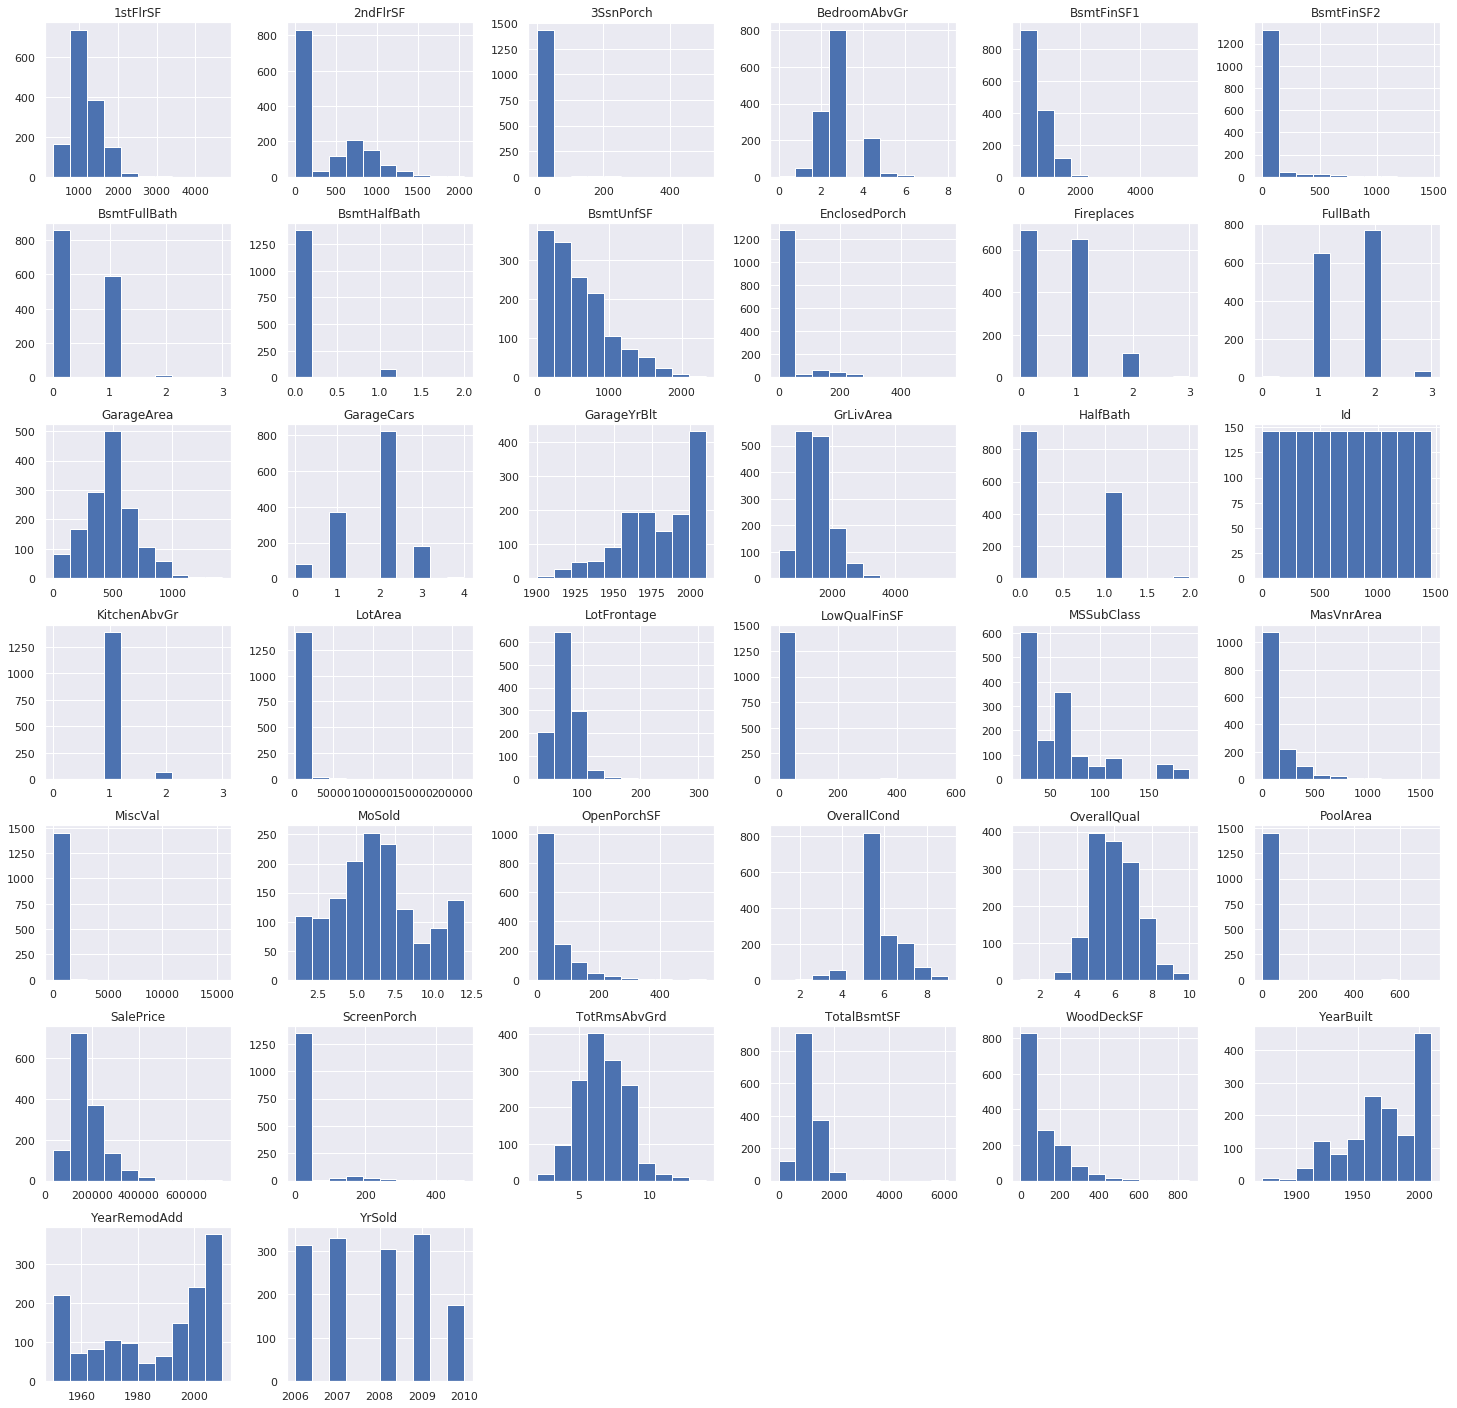

In [0]:
# histograms for the variables
train.hist(figsize=(25,25));

After observing these distributions we already have an idea about the missing values and some possible outliers. We'll deal with them later on.

Now that we've seen the distribution of the whole dataset, let's take a closer look at the variables that interests us the most: SalePrice

In [0]:
# SalePrice distribution
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

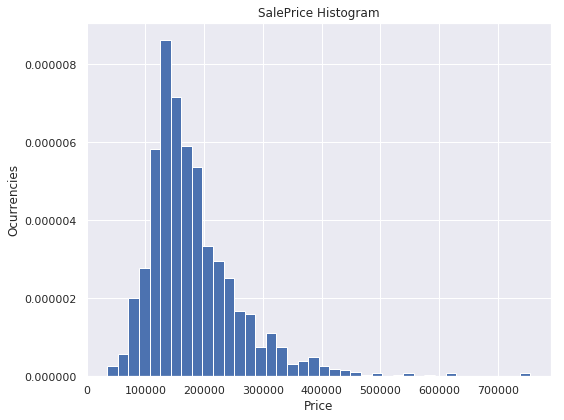

In [0]:
#histogram
fig, ax = plt.subplots()

train["SalePrice"].plot(kind='hist',ax=ax, density=True, bins=40, figsize=(8,6))
ax.set_title("SalePrice Histogram")
ax.set_ylabel("Ocurrencies")
ax.set_xlabel("Price")

plt.tight_layout()

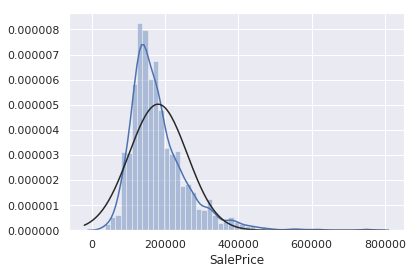

In [0]:
# distplot
from scipy.stats import norm
ax = sns.distplot(train.SalePrice, fit=norm, kde=True)

Now, that we understand the variable SalePrice a little better, let's see how it correlates to other variables, and find out the variables that influence SalePrice the most.


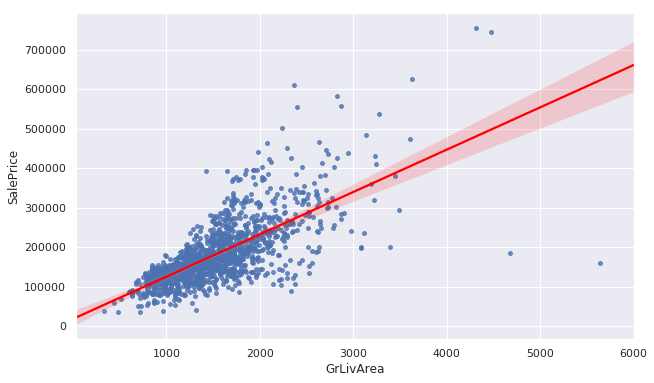

In [0]:
# scatter plot and linear regression
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=30,right=6000)
sns.regplot('GrLivArea', 'SalePrice', scatter_kws={"s": 15},
            line_kws={"color": "red"}, data=train, ax=ax);

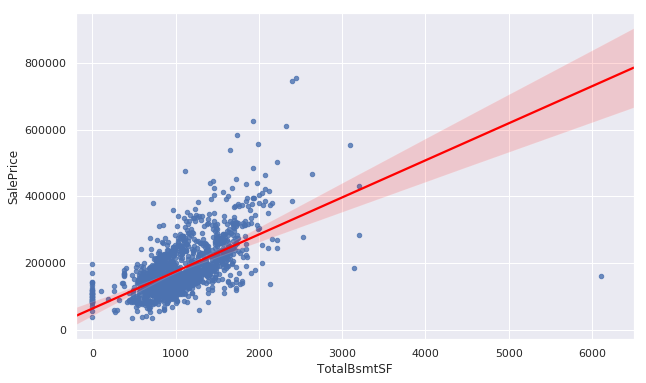

In [0]:
# scatter plot and linear regression
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=-200,right=6500)
sns.regplot('TotalBsmtSF', 'SalePrice', scatter_kws={"s": 20},
            line_kws={"color": "red"}, data=train, ax=ax);

According to the graphs above, we can visualize a **linear relation** between SalePrice and both GrLivArea and TotalBsmtSF.

Now, let's analyze its relation with OverallQual and YearBuilt.

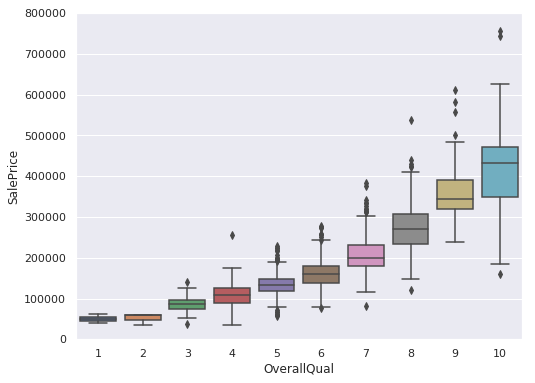

In [0]:
# boxplots for OverallQual
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

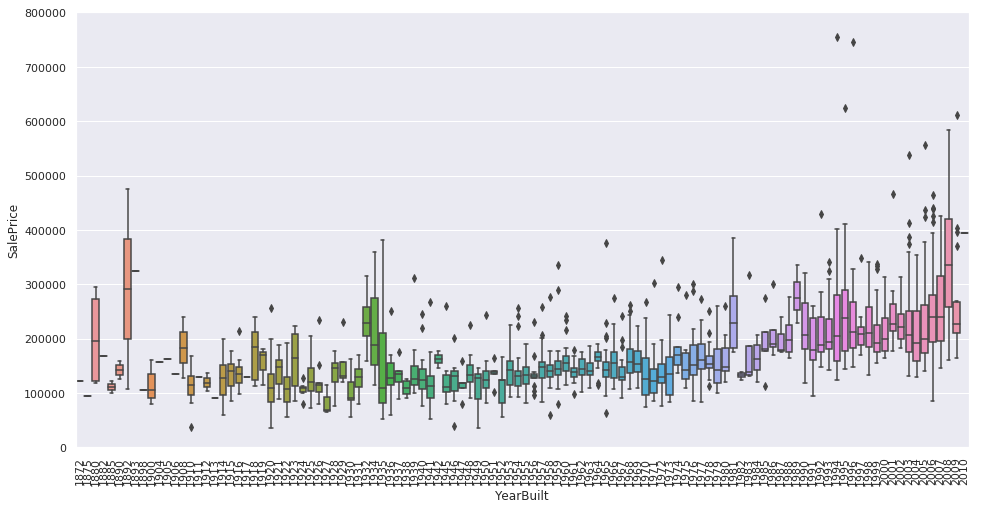

In [0]:
# boxplots for YearBuilt
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

**After analyzing these graphs we can come to some conclusions:**

* There is a strong relation between SalePrice and both GrLivArea and TotalBsmtSF.

* SalePrice is also strongly related to OverallQual and YearBuilt. 

When it comes to **OverallQual** it's pretty easy to understand why there is a relation. The graph just proved it.

Regarding **Year Built** the graph is quite interesting. We can see a rise as the years pass, but there are some pretty expensive houses that were built a long time ago.

The next step is checking how SalePrice correlates with other variables, and take a closer look at them. To do that, let's plot a *heatmap* with the correlations between the variables.

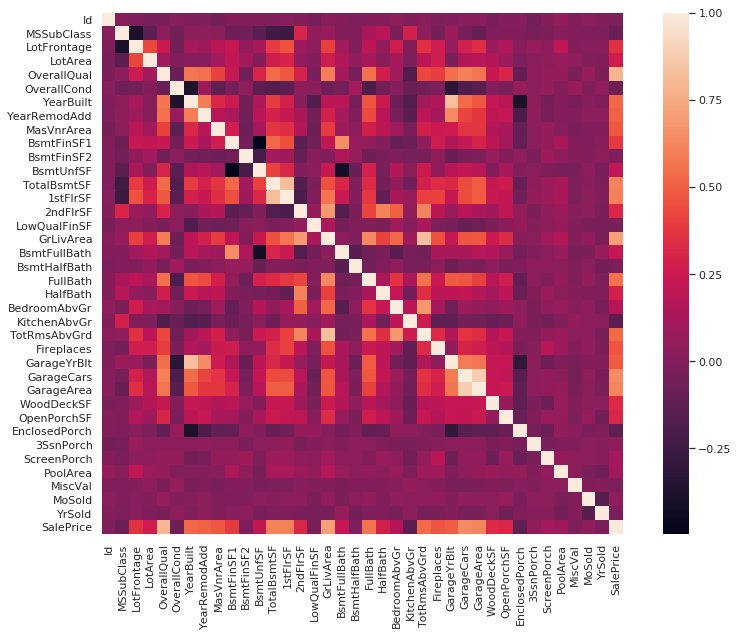

In [0]:
# creating the correlation matrix
corr = train.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=False);
plt.tight_layout()

After taking a look at this heatmap and the correlation among all of these variables, it's time to take a closer look at the ones most related to the target variable SalePrice

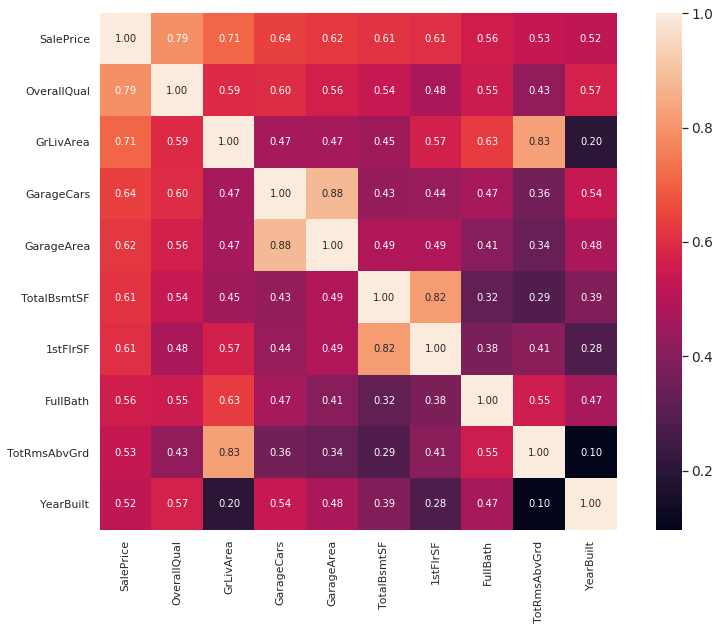

In [0]:
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)

# plotting the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

An interesting aspect of this heatmap is that variables are sorted from most correlated to least correlated, which can help us come to some conclusions:

* OverallQual, and GrLivArea are the most relevant variables when it comes to SalePrice
* GarageCars and GarageArea also seems to be one of the main factors when it comes to price. However, the more car we can fit into the garage (GarageCars), more space we're going to need (GarageArea). Since these two are dependent on each other, when it comes to our model, we'll use only GarageCars, which is the most related to SalePrice between the two.
* Something similar happens when we analyze TotalBsmtSF and 1stFlrSF. Following the same pattern, let's stick to TotalBsmtSF
* The strongest correlation in the heatmap is between GrLivArea and TotRmsAbvGrd, which shows that one follows the other. Again, let's focus on one of them, which will be GrLivArea

With that in mind, let's take a look at some other graphs:


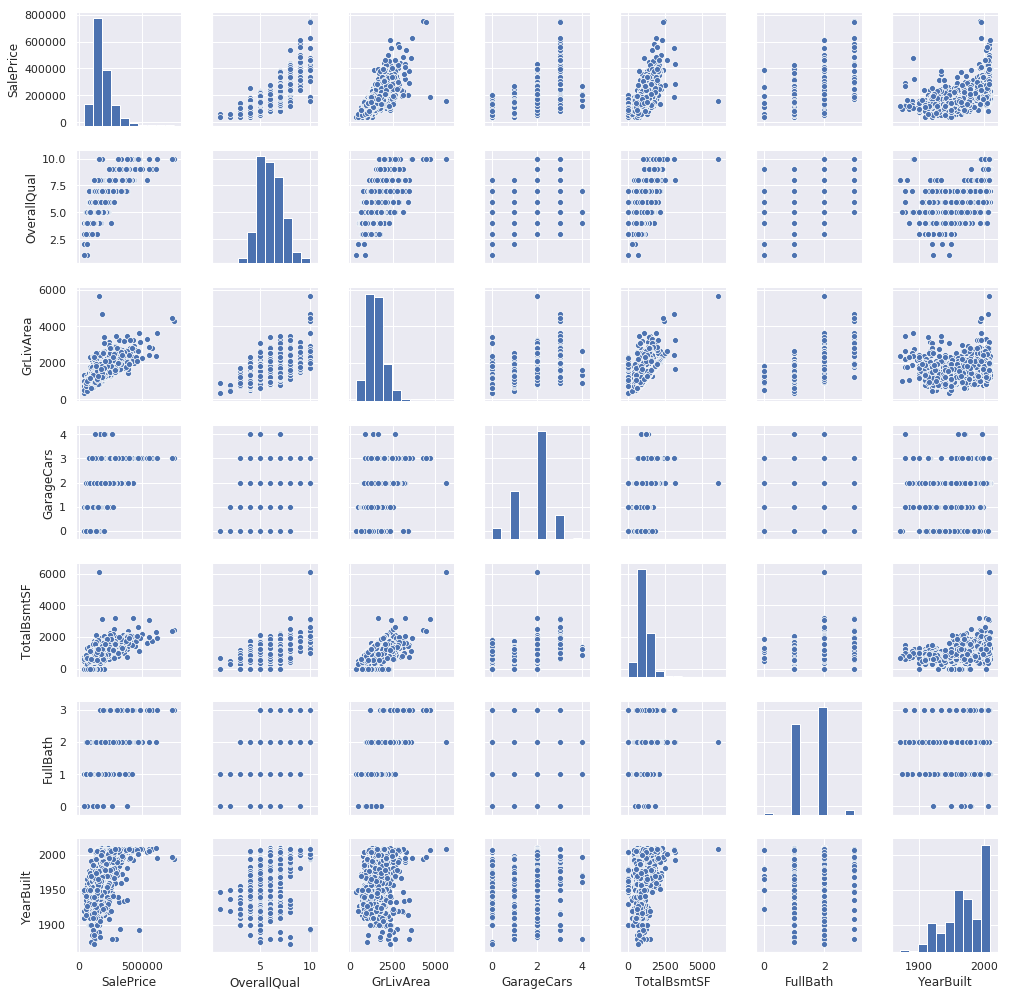

In [0]:
# scatterplot for main variables vs SalePrice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'];
sns.pairplot(train[cols], height = 2);
plt.show();


When analyzing the graphs above, some things are interesting to notice:

* The correlation between TotalBsmtSF and GrLivArea. Basements are usually smaller or at most the same size in square feet as the area above ground, but not bigger than it. We can see that in their scatter plot.
* The scatter plot between SalePrice and YearBuilt show that in general, the newer the house, the more expensive it's going to be. However, prices seem to have been increasing faster.

### Q3. Preparing the Data

After analyzing and visualizing the factors that influence SalePrice the most, it's time to start preparing the data for our model. To do that, we have to deal with:
* Missing Data
* Outliers
* Categorical Data



**To start off with, let's put our train and test datasets together, so we can work on both of them at once.**

It's a good idea to do this because it saves time and helps us avoid mistakes.

We'll separate them again at the end before building our model.

In [0]:
# saving the indexes of the datasets for later recovery
train_idx = train.shape[0]
test_idx = test.shape[0]

# saving Id for Kaggle submission
Id = test['Id']

# extracting the column 'SalePrice' and excluding it from the train dataset
target = train.SalePrice.copy()
train.drop(['SalePrice'], axis=1, inplace=True)

# concatenating train and test into one DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("Shape of the DataFrame")
print("Variables:\t{}\nEntries:\t{}".format(df_merged.shape[1], df_merged.shape[0]))

Shape of the DataFrame
Variables:	80
Entries:	2919


In [0]:
# checking the percentage of missing values
# total missing data
total = df_merged.isnull().sum().sort_values(ascending=False)

# percentage of missing values
percent = (df_merged.isnull().sum()/df_merged.isnull().count()).sort_values(ascending=False)

# presenting the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


Here's what we can take from the table above, and then we can analyze or options to deal with this missing data.

First, it's important to understand that many of these variables with missing values are part of other more complete variables. For example, Garage related variables have GarageCars as the most important variables, Quality related variables have OverallQual as the most important one. With that in mind, here's what we're going to do with this kinds of variables:

* If the missing values account for more than 15%, we'll drop the entire variables.
* If the variable with missing values is one of those mentioned as being part of a more complete variables, we'll drop those too.

In [0]:
# dropping variables with more than 1 missing value
df_merged = df_merged.drop((missing_data[missing_data['Total'] > 1]).index,1)

# dropping the rows of the following variables that have missing values
df_merged = df_merged.drop(df_merged.loc[df_merged['Electrical'].isnull()].index)
df_merged = df_merged.drop(df_merged.loc[df_merged['GarageCars'].isnull()].index)

 #just checking that there's no missing data missing...
df_merged.isnull().sum().max() 

1

In [0]:
# checking the percentage of missing values
# total missing data
total = df_merged.isnull().sum().sort_values(ascending=False)

# percentage of missing values
percent = (df_merged.isnull().sum()/df_merged.isnull().count()).sort_values(ascending=False)

# presenting the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)

,Total,Percent
TotalBsmtSF,1,0.000343
BsmtUnfSF,1,0.000343
SaleType,1,0.000343
BsmtFinSF2,1,0.000343
BsmtFinSF1,1,0.000343
Exterior2nd,1,0.000343
Exterior1st,1,0.000343
KitchenQual,1,0.000343
Foundation,0,0.000000


At this point, we've already eliminated most of the variables we're not going to need for our model.

We had to drop those with **more** than 1 missing value because we had a very important variable with 1 missing value: GarageCars.

With that fixed, we can now remove these lines too. Again, these variables are not as relevant for our model, and are "complements/twins" of other more relevant variables. They're somehow represented in other variables.

In [0]:
# dropping another variable
df_merged = df_merged.drop((missing_data[missing_data['Total'] >= 1]).index,1)
df_merged.isnull().sum().max() 

0

In [0]:
# checking the percentage of missing values
# total missing data
total = df_merged.isnull().sum().sort_values(ascending=False)

# percentage of missing values
percent = (df_merged.isnull().sum()/df_merged.isnull().count()).sort_values(ascending=False)

# presenting the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SaleCondition,0,0.0
HeatingQC,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0


After eliminating the variables with missing values that we are not going to use, let's anayze which variables we should actually keep

In [0]:
print("Shape of the DataFrame")
print("Variables:\t{}\nEntries:\t{}".format(df_merged.shape[1], df_merged.shape[0]))

Shape of the DataFrame
Variables:	49
Entries:	2917


As you can see, we've already made the number of variables a lot more manageable.

Let's check what variables we still have.

In [0]:
df_merged.dtypes

Id                 int64
MSSubClass         int64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
ExterQual         object
ExterCond         object
Foundation        object
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars       float64
GarageArea       float64
PavedDrive        object
WoodDeckSF         int64


In [0]:
df_merged.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,2.0,548.0,Y,0,61,0,0,0,0,0,2,2008,Normal
1,2,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,2.0,460.0,Y,298,0,0,0,0,0,0,5,2007,Normal
2,3,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,2.0,608.0,Y,0,42,0,0,0,0,0,9,2008,Normal
3,4,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,3.0,642.0,Y,0,35,272,0,0,0,0,2,2006,Abnorml
4,5,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,3.0,836.0,Y,192,84,0,0,0,0,0,12,2008,Normal


Selecting Features

Dropping Unecessary Features

In [0]:
# df_merged = df_merged.drop(('LowQualFinSF','GarageArea','3SsnPorch','ScreenPorch','KitchenAbvGr'),axis=1, inplace=True)
# df_merged = df_merged.drop(df_merged.loc[df_merged['LowQualFinSF','GarageArea','3SsnPorch','ScreenPorch','KitchenAbvGr']].index)
df_merged.drop(['LowQualFinSF','GarageArea','3SsnPorch','ScreenPorch','KitchenAbvGr'], axis=1, inplace=True)

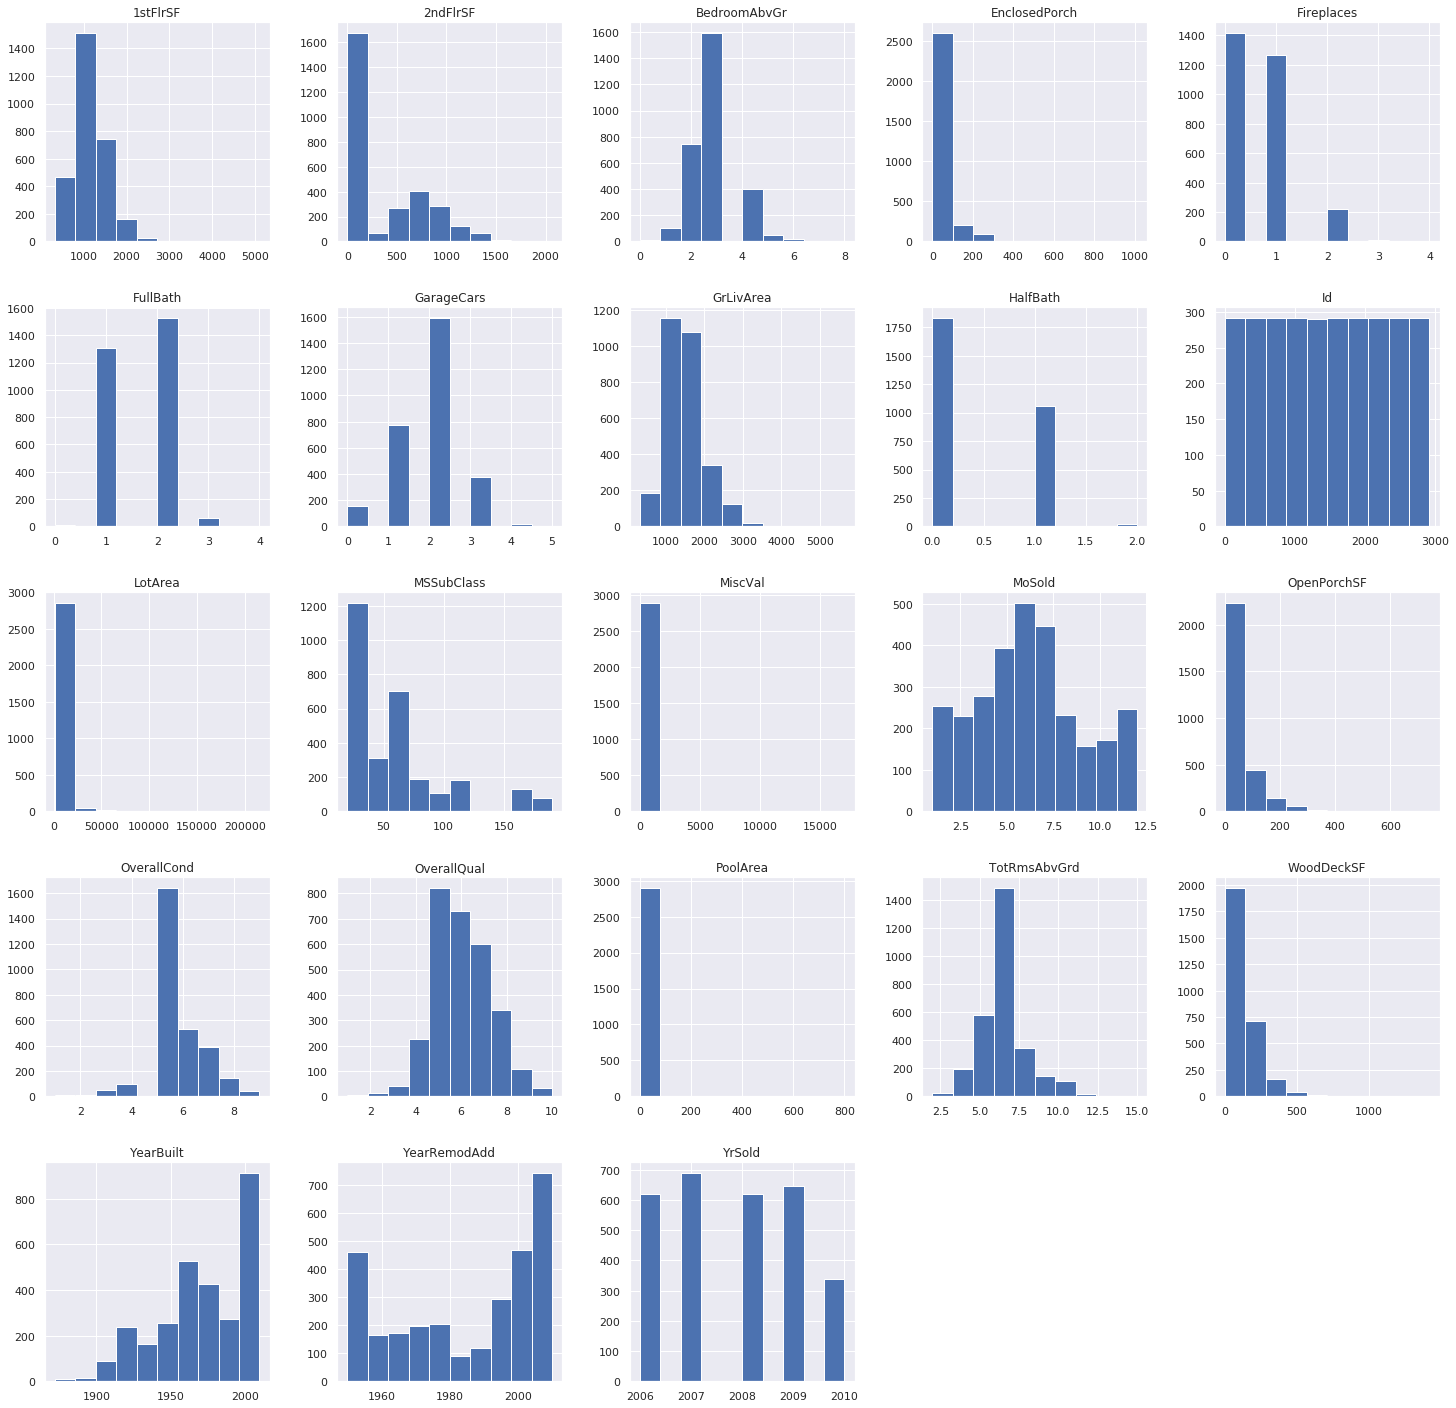

In [0]:
# histograms for the variables
df_merged.hist(figsize=(25,25));

### Outliers

When considering outliers, it's important to analyze many different aspects of the dataset. One of them, is the size of the dataset. In our case, it's a small dataset, and the outliers are not too far off from the regular distribution and are not big in numbers (rare).

If outliers are rare, they have no to little statistical impact. In small samples they will be extremely rare (what is not a statistical problem, and is our case).

For now, let's work with the dataset as is. When alayzing our model's efficiency, we'll consider taking a closer look at these.

### Categorical Data

In order to take our categorical into account in our model, it's important to make sure they 'fit'. For that, let's create *Dummify* these variables, so that they can be analyzed by our model.

In [0]:
# dummy variables
df_merged = pd.get_dummies(df_merged)

In [0]:
# shape of the dataset after getting dummy variables
print("Shape of the DataFrame")
print("Variables:\t{}\nEntries:\t{}".format(df_merged.shape[1], df_merged.shape[0]))

Shape of the DataFrame
Variables:	152
Entries:	2917


### Separating Train and Test dataset

Now that our dataset is ready for the creation of our *Machine Learning* model, it's time to separate our dataset again.

In [0]:
# recovering train and test datasets
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## House Prices Prediction

The objective of this project is to create a Machine Learning model to predict the prices of houses in the city of Ames, Iowa.


In [0]:
# importing the necessary packages
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### XGBoost

In [0]:
# determining X e y
X = train
y = target

# dividing the dataset between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# creating and training the model
ml_model = XGBRegressor(learning_rate=0.05, n_estimators=1000,
                         max_depth=4, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42)
ml_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.1, gamma=1,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [0]:
# predictions and probabilities on the test dataset
predictions = ml_model.predict(X_test)

# accuracy of the model
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))
print("R2 Score : ", r2_score(predictions, y_test))

Mean Absolute Error : 22171.315946061644
Mean Squared Error : 1266260545.3864038
R2 Score :  0.7413717075738953


In [0]:
# submitting the results to Kaggle
from google.colab import files

predictions = ml_model.predict(X_test)

submission = pd.DataFrame({
    "Id": Id,
    "SalePrice": predictions
})

submission.to_csv('house_prices_xgb.csv', index=False)
files.download('house_prices_xgb.csv')

ValueError: ignored

Conclusions